# Adversarial Attack

In [20]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import cv2
from PIL import Image
import pandas as pd

In [22]:
# Metadaten für das Programm 
data = []
labels = []
height = 30
width = 30
channels = 3
classes = 43
input_size = height * width * channels

In [23]:
# Verkehrsschilder 
sign_label = ["20 km/h","30 km/h","50 km/h","60 km/h","70 km/h","80 km/h","80 km/h Aufhebung","100 km/h",
          "120 km/h", "Überholverbot", "LKW-Überholverbot", "Vorfahrt", "Vorfahrtsstraße","Vorfahrt gewähren", 
          "Stop","Fahrverbot","Verbot für Lastwagen","Einfahrt verboten","Gefahr","Linkskurve","Rechtskurve","Doppelkurve",
          "Bodenwelle","Schleudergefahr","Verengung","Baustelle","Ampel","Zebrastreifen","Kinder","Fahrradweg","Schneegefahr",
          "Wildwechsel","Unbegrenzte Geschwindigkeit","Rechtsabbiegen", "Linksabbiegen", "Geradeaus fahren", "Geradeaus oder Rechtsabbiegen",
          "Geradeaus oder Linksabbiegen", "Hindernis rechts umfahren", " Hindernis links umfahren", "Kreisverkehr", "Ende des Überholverbotes",
          "Ende des LKW-Überholverbotes"]

In [24]:
# Laden der Test-Daten 
y_test=pd.read_csv(r'.\Test.csv')
names =y_test['Path'].to_numpy()
y_test =y_test['ClassId'].values
data=[]

In [25]:
from tqdm import tqdm
for f in tqdm(names):
    image=cv2.imread(r'.\Test/'+f.replace('Test', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

100%|██████████| 12630/12630 [00:25<00:00, 493.84it/s]


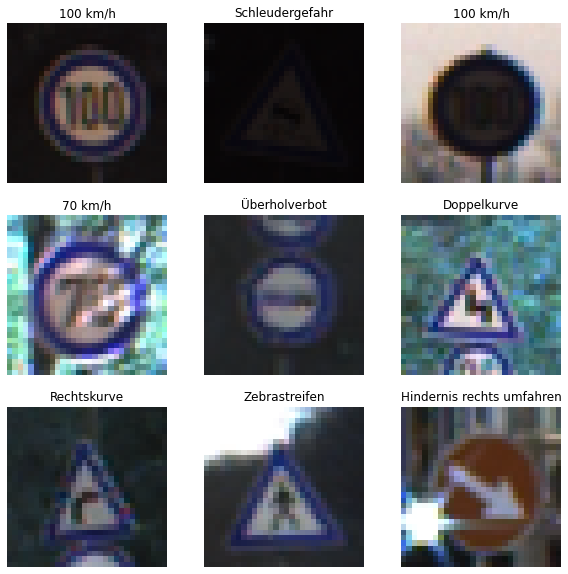

In [26]:
# Beispiele aus dem Test Dataset
fig=plt.figure(figsize=(10, 10))
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    x = i+10
    fig.add_subplot(rows, columns, i)
    plt.imshow(data[x])
    plt.title(sign_label[y_test[x]])
    plt.axis("off")
plt.show()

In [27]:
model = keras.models.load_model("Traffic_Sign_Net")

In [28]:
x_test=np.array(data)
x_test = x_test.astype('float32')/255
pred = model.predict(x_test)

In [29]:
# Function to create adversarial pattern
def adversarial_pattern(image, label):
    image = tf.cast(image, tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tf.keras.losses.MSE(label, prediction)
    
    gradient = tape.gradient(loss, image)
    
    signed_grad = tf.sign(gradient)
    
    return signed_grad

Noise: 0.0
Noise: 0.001
Noise: 0.002
Noise: 0.003
Noise: 0.004
Noise: 0.005
Noise: 0.006
Noise: 0.007
Noise: 0.008
Noise: 0.009000000000000001
Noise: 0.01
Noise: 0.011
Noise: 0.012
Noise: 0.013000000000000001
Noise: 0.014
Noise: 0.015
Noise: 0.016
Noise: 0.017
Noise: 0.018000000000000002
Noise: 0.019
Noise: 0.02
Noise: 0.021
Noise: 0.022
Noise: 0.023
Noise: 0.024
Noise: 0.025
Noise: 0.026000000000000002
Noise: 0.027
Noise: 0.028
Noise: 0.029
Noise: 0.03
Noise: 0.031
Noise: 0.032
Noise: 0.033
Noise: 0.034
Noise: 0.035
Noise: 0.036000000000000004
Noise: 0.037
Noise: 0.038
Noise: 0.039
Noise: 0.04
Noise: 0.041
Noise: 0.042
Noise: 0.043000000000000003
Noise: 0.044
Noise: 0.045
Noise: 0.046
Noise: 0.047
Noise: 0.048
Noise: 0.049
Noise: 0.05
Noise: 0.051000000000000004
Noise: 0.052000000000000005
Noise: 0.053
Noise: 0.054
Noise: 0.055
Noise: 0.056
Noise: 0.057
Noise: 0.058
Noise: 0.059000000000000004
Noise: 0.06
Noise: 0.061
Noise: 0.062
Noise: 0.063
Noise: 0.064
Noise: 0.065
Noise: 0.066
No

Noise: 0.562
Noise: 0.5630000000000001
Noise: 0.5640000000000001
Noise: 0.5650000000000001
Noise: 0.5660000000000001
Noise: 0.5670000000000001
Noise: 0.5680000000000001
Noise: 0.5690000000000001
Noise: 0.5700000000000001
Noise: 0.5710000000000001
Noise: 0.5720000000000001
Noise: 0.5730000000000001
Noise: 0.5740000000000001
Noise: 0.5750000000000001
Noise: 0.5760000000000001
Noise: 0.577
Noise: 0.578
Noise: 0.579
Noise: 0.58
Noise: 0.581
Noise: 0.582
Noise: 0.583
Noise: 0.584
Noise: 0.585
Noise: 0.586
Noise: 0.587
Noise: 0.588
Noise: 0.589
Noise: 0.59
Noise: 0.591
Noise: 0.592
Noise: 0.593
Noise: 0.594
Noise: 0.595
Noise: 0.596
Noise: 0.597
Noise: 0.598
Noise: 0.599
Noise: 0.6
Noise: 0.601
Noise: 0.602
Noise: 0.603
Noise: 0.604
Noise: 0.605
Noise: 0.606
Noise: 0.607
Noise: 0.608
Noise: 0.609
Noise: 0.61
Noise: 0.611
Noise: 0.612
Noise: 0.613
Noise: 0.614
Noise: 0.615
Noise: 0.616
Noise: 0.617
Noise: 0.618
Noise: 0.619
Noise: 0.62
Noise: 0.621
Noise: 0.622
Noise: 0.623
Noise: 0.624
Noise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Noise: 0.998
Noise: 0.999
Vorfahrt gewähren
Vorfahrt gewähren


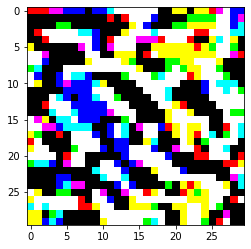

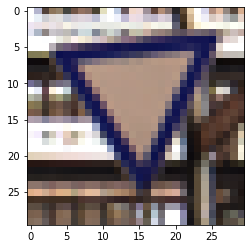

In [50]:
height = 30
width = 30
channels = 3
max_iterations = 1.0
i = 51
image = x_test[i]
plt.imshow(image)
image_label = y_test[i]

perturbations = adversarial_pattern(image.reshape((1, height, width, channels)), image_label).numpy()

for x in np.arange(0.0, max_iterations, 0.001):
    print("Noise:", x)
    adversarial = image + perturbations * x
    if sign_label[model.predict(image.reshape((1, height, width, channels))).argmax()] != sign_label[model.predict(adversarial).argmax()]:
        break
        
print(sign_label[model.predict(image.reshape((1, height, width, channels))).argmax()])
print(sign_label[model.predict(adversarial).argmax()])

if channels == 1:
    plt.imshow(adversarial.reshape((height, width)))
else:
    plt.imshow(adversarial.reshape((height, width, channels)))
plt.show()

image = x_test[i]
plt.imshow(image)